# CS:GO Economy Simulation

### Imports and Variable Initialization

In [72]:
import importlib
import CS_EcoAnalyzer as cs
import matplotlib.pyplot as plt

In [73]:
#!\usr\bin\python


market = {'AWP': 4750,
          'AK47': 2700,
          'M4A4': 3100,
          'M4A1': 2900,
          'Famas': 2050,
          'Galil': 1800,
          'Scout': 1700, 
          'Mag7': 1300, 
          'MP9': 1250,
          'Mac10': 1050,
          'Deagle': 700,
          'P250': 300,
          'Vesthelm': 1000,
          'Vest': 650,
          'Smoke': 300,
          'Flash': 200,
          'Molly': 400,
          'HE': 300,
          'Incendiary': 600,
          'DefuseKit': 400
         }
          

full_util_CT = market['Vesthelm'] + market['Smoke'] + market['Incendiary'] + market['Flash'] + market['HE'] + market['DefuseKit']
even_util_CT = market['Vest'] + market['Smoke'] + market['Incendiary'] + market['Flash'] + market['HE'] + market['DefuseKit']
light_util_CT = market['Vest'] + market['Smoke'] +  market['Flash']*2 +  market['DefuseKit'] 

ct_max_buy = market['AWP']*2 + market['M4A4']*3 + full_util_CT*5 - (market['Vesthelm']-market['Vest'])*2
ct_even_buy =  market['AWP']*1 + market['M4A4']*2 + market['M4A1']*2+ even_util_CT*5 - market['Incendiary'] - market['DefuseKit']*2
ct_light_buy = market['M4A4']*3 + market['Famas']*2 + light_util_CT*5  - market['DefuseKit']*3 + market['Incendiary']*3 

full_util_T = market['Vesthelm']+market['Smoke']+market['Molly']+market['Flash']*2
t_max_buy =  market['AWP']*1 + market['AK47']*4 + full_util_T*5
t_even_buy = market['AK47']*5 + full_util_T*5
t_light_buy = market['AK47']*2 + market['Galil']*3 + full_util_T*4 - market['Molly']*2

t_win_lean = ct_even_buy/t_even_buy
t_plant_lean = ct_even_buy/t_light_buy

ct_buy_levels = [ct_max_buy/5, ct_even_buy/5, ct_light_buy/5]
t_buy_levels = [t_max_buy/5, t_even_buy/5, t_light_buy/5]

starting_money = 800
starting_loss = 1
force_percent = market['Vest']/starting_money

eco_rules = {'starting_mny': starting_money,
             'starting_loss': starting_loss,
             'win_reward': 3250,
             'loss_reward': 1400,
             'loss_increment': 500,
             'kill_reward': 300,
             'plant_reward': 800,
             'max_mny': 16000,
             'max_loss': 5,
             'market': market,
             'ct_bl': ct_buy_levels, 
             't_bl': t_buy_levels,
             't_win_lean': t_win_lean,
             't_plant_lean': t_plant_lean,
             'MR': 15,
             # NO IDEA about these values, pure guesswork
             'win_live_rate': .4, 
             'force_plant_odds': .2,
             'ct_save_odds': .8,
             'force_percent': force_percent
            }
            
starting_gamestate = {'ct_mny': eco_rules['starting_mny'],
                    'ct_loss':eco_rules['starting_loss'],
                    't_mny':eco_rules['starting_mny'],
                    't_loss':eco_rules['starting_loss'],
                    't_wins':0,
                    'rnds_played':0
                   }  

#### Simulating a single half and outputting the results of each round

In [74]:
importlib.reload(cs)

n_of_1 = cs.half_simulator(eco_rules, starting_gamestate, 1)

for i in range(eco_rules['MR']):
    print("Round ", i, "- \n", n_of_1[0][i], "\n")

Round  0 - 
 {'result': 'T', 'CT_mnyinvest': 650.0, 'CT_buyoption': 'F', 'T_mnyinvest': 650.0, 'T_buyoption': 'F', 'gamestate': {'ct_mny': 2550.0, 'ct_loss': 2, 't_mny': 3960.0, 't_loss': 0, 't_wins': 1, 'rnds_played': 1}} 

Round  1 - 
 {'result': 'T', 'CT_mnyinvest': 0, 'CT_buyoption': 'S', 'T_mnyinvest': 3680.0, 'T_buyoption': 'B', 'gamestate': {'ct_mny': 5450.0, 'ct_loss': 3, 't_mny': 5302.0, 't_loss': 0, 't_wins': 2, 'rnds_played': 2}} 

Round  2 - 
 {'result': 'CT', 'CT_mnyinvest': 4550.0, 'CT_buyoption': 'B', 'T_mnyinvest': 5210.0, 'T_buyoption': 'B', 'gamestate': {'ct_mny': 6270.0, 'ct_loss': 2, 't_mny': 1992.0, 't_loss': 1, 't_wins': 2, 'rnds_played': 3}} 

Round  3 - 
 {'result': 'CT', 'CT_mnyinvest': 5520.0, 'CT_buyoption': 'B', 'T_mnyinvest': 0, 'T_buyoption': 'S', 'gamestate': {'ct_mny': 6508.0, 'ct_loss': 1, 't_mny': 4392.0, 't_loss': 2, 't_wins': 2, 'rnds_played': 4}} 

Round  4 - 
 {'result': 'CT_bp', 'CT_mnyinvest': 6420.0, 'CT_buyoption': 'B', 'T_mnyinvest': 3680.0, '

## Large-Scale Simulation

#### n = 10,000
#### Light Visualization Included

In [76]:
n = 10000
simulation = cs.half_simulator(eco_rules, starting_gamestate, n)

outcomes = ['T', 'T_s', 'CT', 'CT_fp', 'CT_bp']
pistol_results = []
half_results = []
round_results = []

for i in range(n):
    pistol_results.append(simulation[i][0]['result'])
    half_results.append(simulation[i][-1]['gamestate']['t_wins'])
    
    
for j in range(eco_rules['MR']):
        round_results.append([simulation[i][j]['result'] for i in range(n)])

(array([2049.,    0.,    0., 2004.,    0.,    0., 3366.,    0.,    0.,
        2581.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

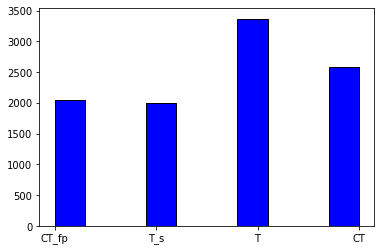

In [77]:
plt.hist(pistol_results, color = 'blue', edgecolor = 'black')

(array([2.000e+00, 1.400e+01, 2.000e+02, 3.660e+02, 2.551e+03, 2.216e+03,
        3.477e+03, 7.160e+02, 4.320e+02, 2.600e+01]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

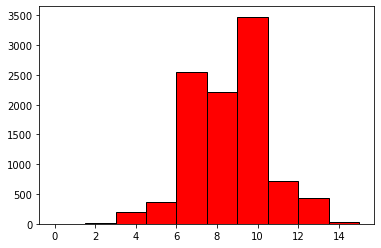

In [78]:
plt.hist(half_results, color = 'red', edgecolor = 'black')

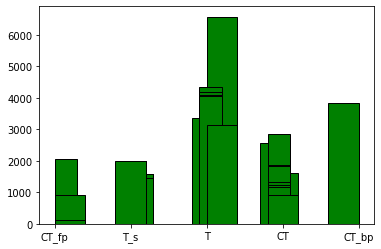

In [84]:
for k in range(eco_rules['MR']):
    plt.hist(round_results[k], color = 'green', edgecolor = 'black', stacked=False)
